**Part 1): Understanding the parameters of the Hidden Markov Model (HMM)**

In this part of the assignment, you will understand the functionality of the different parameters of the Hidden Markov Model (HMM). Specifically, we will sample the observations from the HMM model with different parameters to understand their influence. Let us consider the 4-state HMM with 2D observations and assume that the states of the HMM follow the Gaussian distribution. 
 
1. **Understanding the functionality of transition matrix** : 

  i. Change the transition matrix of the HMM i.e skipping some transitions, having different strengths for particular state transitions, etc 

  ii. Sample the sequence of observations with the original and altered transition matrix and plot them

  iii. Write your obervations for each case in the report. 

2. **Understanding the functionality of emission probability** : 

  i. Change the mean of the Gaussian in each state of the HMM i.e means as conrners of sqaures  etc.

  ii. Change covariance matrix of the Gaussian in each state of the HMM i.e Isotropic, diagonal, full etc. 

  ii. Sample the sequence of observations with the original and altered Gausian distribution and plot them
  
  iii. Write your obervations for each case in the report.

In [ ]:
#All imports
!pip install hmmlearn
from hmmlearn import hmm
import numpy as np
import librosa
import matplotlib.pyplot as plt
import random

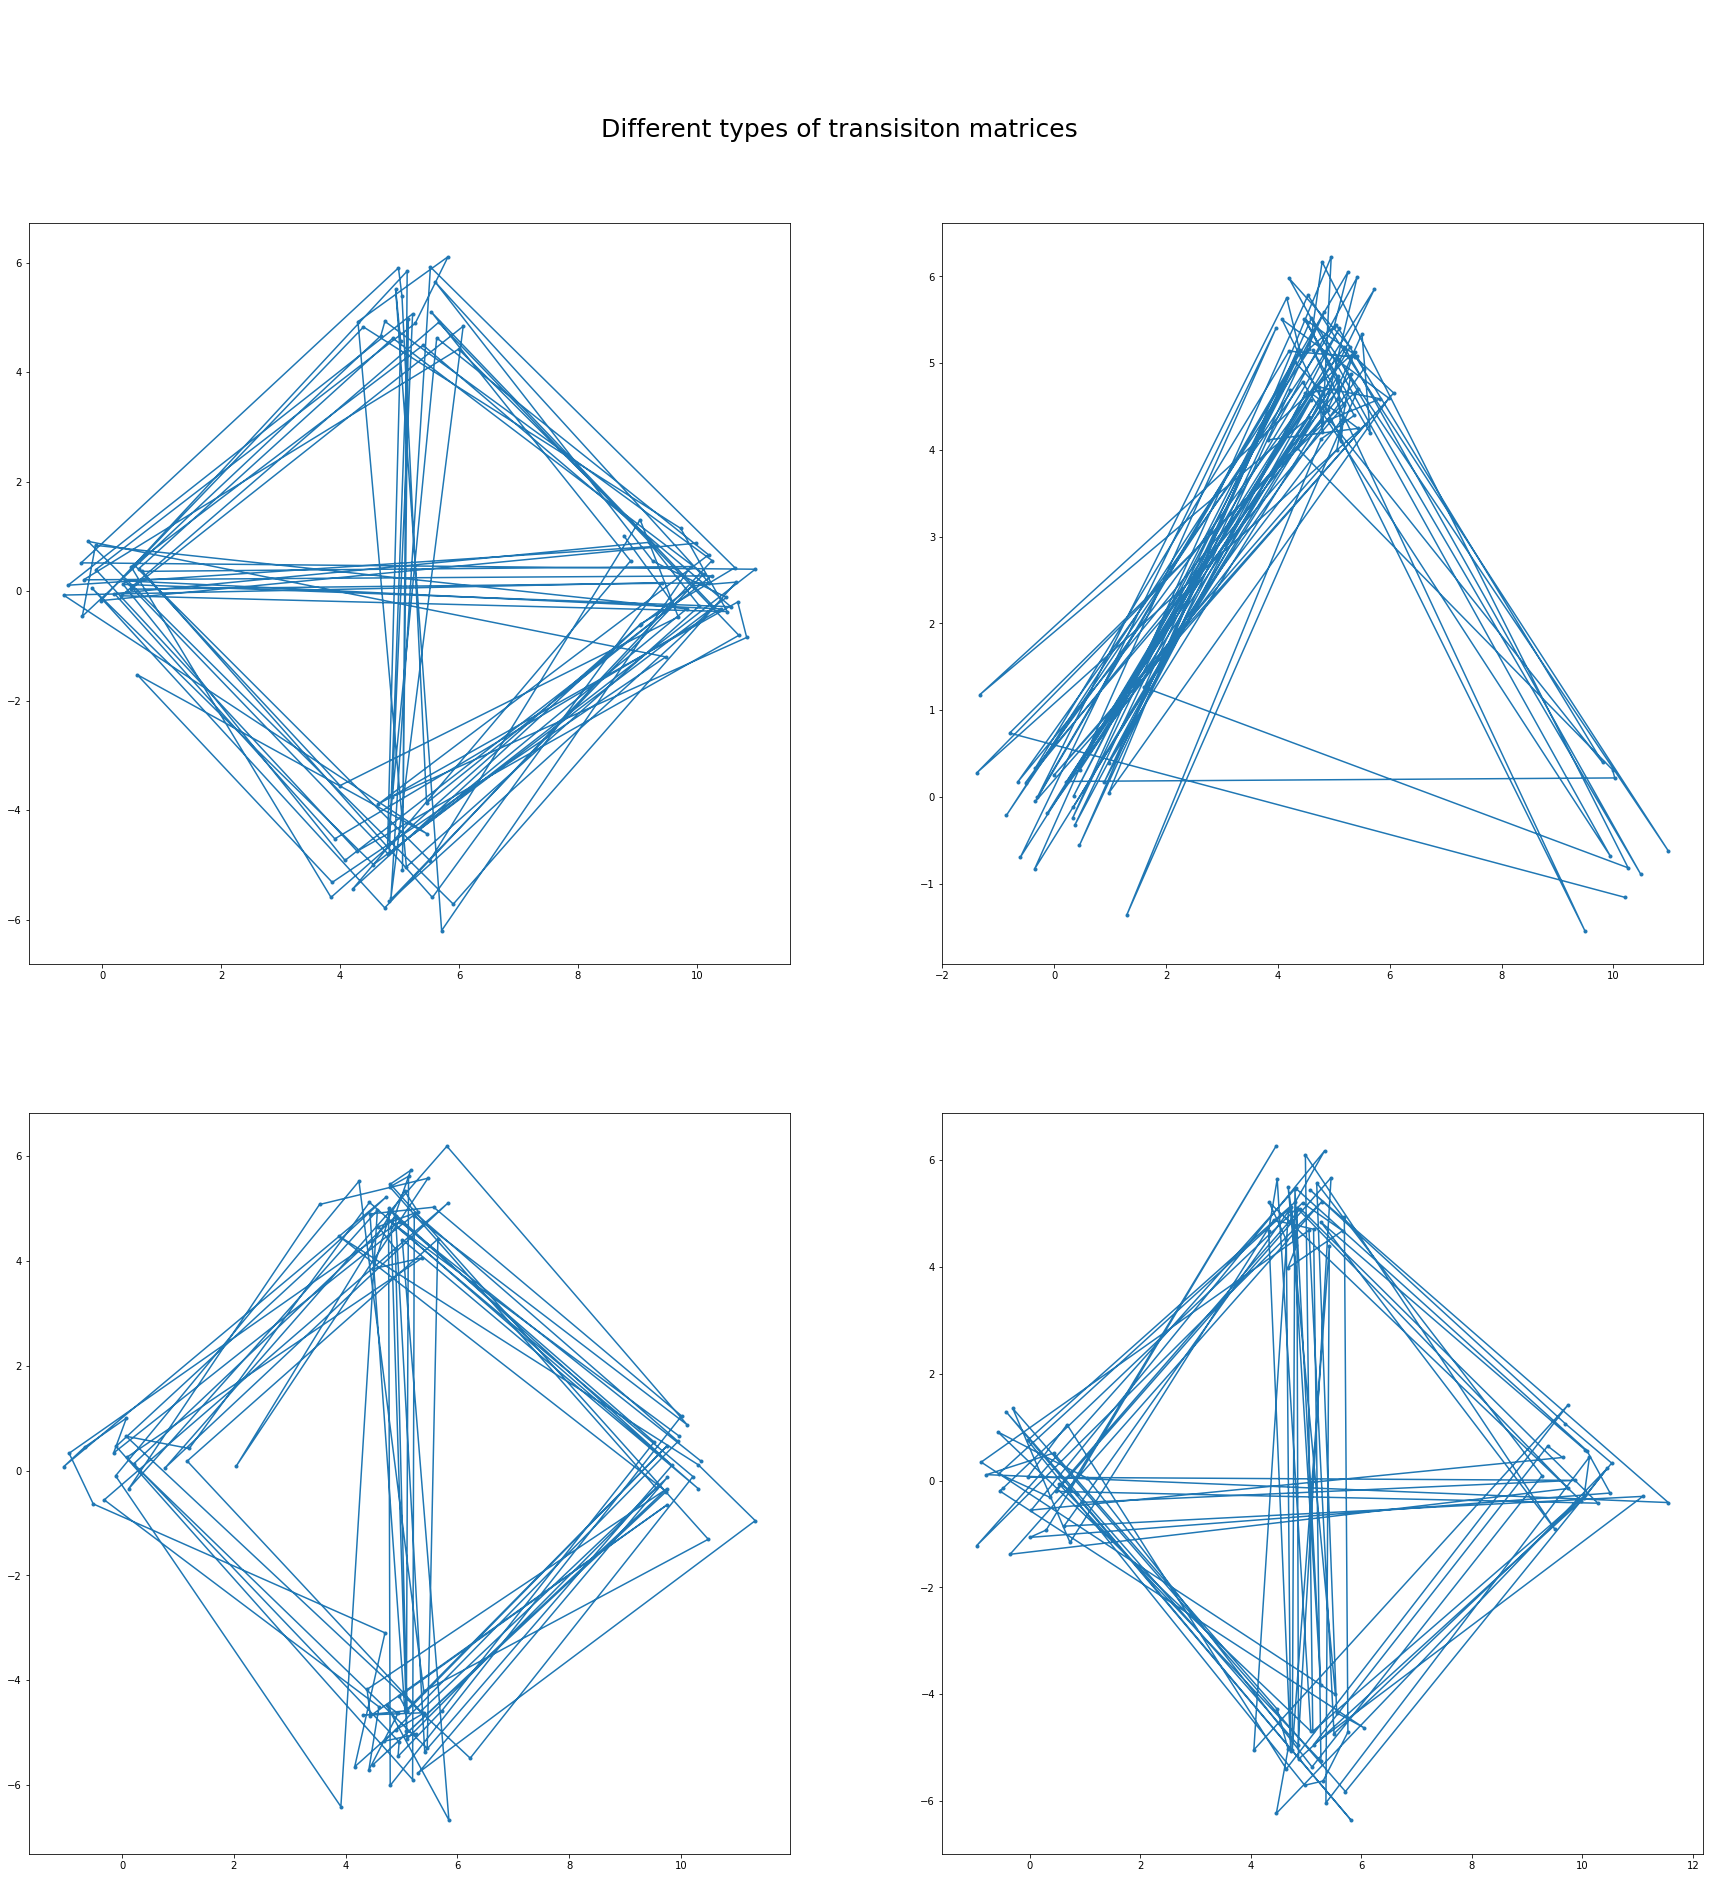

In [ ]:
#You can use the built in hmm functions to generate the samples
#Set different types of transition matrix as initialization and generate the observations
#Let us use the four state hmm

#Set the prior probabilities. Note: It should follow the axioms of probability.
startprob = np.array([0.2, 0.3, 0.3, 0.2])

#Initialize the mean of the Gaussian in each state ( four states with single gaussian ) 
means = np.array([ [0, 0] , [5, 5] , [10, 0] , [5, -5] ])

#Initialize the covariance of the Gaussians in each state 
cov = 0.3
cov_mat = [np.eye(2)*cov]
covars = np.array(cov_mat*4) 


#Initialize the transition matrix of the HMM 
transmat = np.array([[0.2,0.3,0.1,0.4],[0.1,0.2,0.3,0.4],[0.25,0.25,0.25,0.25],[0.3,0.1,0.5,0.1]]) 
transmat1 = np.array([[0,1,0,0],[0.3,0.6,0.1,0],[0.4,0.3,0.3,0],[0.2,0.6,0.2,0]])
transmat2 = np.array([[0.4,0.2,0,0.4],[0.3,0.3,0.4,0],[0,0.3,0.4,0.3],[0,0.3,0.2,0.5]]) 
transmat3 = np.array([[0.25,0.25,0.25,0.25],[0.25,0.25,0.25,0.25],[0.25,0.25,0.25,0.25],[0.25,0.25,0.25,0.25]]) 

#Build an HMM instance 
model = hmm.GaussianHMM(n_components=4, covariance_type="full") #hmm.HMMGMM() for replacing the single Gaussian with the Mixture of Gaussians
model1 = hmm.GaussianHMM(n_components=4, covariance_type="full")
model2 = hmm.GaussianHMM(n_components=4, covariance_type="full")
model3 = hmm.GaussianHMM(n_components=4, covariance_type="full")


# Set the above parameters in hmm model ( ) 
model.startprob_ = startprob
model.transmat_ = transmat
model.means_ = means
model.covars_ = covars

model1.startprob_ = startprob
model1.transmat_ = transmat1
model1.means_ = means
model1.covars_ = covars

model2.startprob_ = startprob
model2.transmat_ = transmat2
model2.means_ = means
model2.covars_ = covars

model3.startprob_ = startprob
model3.transmat_ = transmat3
model3.means_ = means
model3.covars_ = covars


# Sample observation sequence of 500 length from the HMM model
X, Z = model.sample(100)
X1, Z1 = model1.sample(100)
X2, Z2 = model2.sample(100)
X3, Z3 = model3.sample(100)

# Plot the observation sequence

fig, (px1, px2) = plt.subplots(2,2, figsize=(30, 30))
fig.suptitle("\n\n\n\nDifferent types of transisiton matrices", fontsize = 25)
px1[0].plot(X[:, 0], X[:, 1], ".-")
px1[1].plot(X1[:, 0], X1[:, 1], ".-")
px2[0].plot(X2[:, 0], X2[:, 1], ".-")
px2[1].plot(X3[:, 0], X3[:, 1], ".-")



**Part 2): Isolated Digit Recognition**

In this part of assignment you have to implement the isolated digit recognition system using HMM.
1. Record 5 to 10 repetition each of digits zero,one,two,three,four,five,six,seven,eight and nine (for testing on recorded data). (The modules to record the voice in online mode are provided here. If you are not comfortable using the online recording modules, you can record the digits offline and access them in google colab through proper codes.)
2. Compute MFCC features ( sequence of observations). (The codes to compute the signal's templates ( Mel Frequency Cepstral Coefficients ) are provided. Please use them to obtain the templates of the speech signals.)
3. Train a N state HMM model for each digit and store the model
3. Compute the probability of generating test observation sequence given the trained model of the digits. P(O/λw)
4. Get the predicted label from P(O/λw) where 0<=w<=9
5. Repeat the above experiment by increasing number of states (N) in word HMM ranging from 5 to 15. Report your accuracy and observations.
6. Repeat the above experiment with varying the number of states across the digits i.e you may use large number of states for large digits. Report the accuracy and observations.
7. Experiment with GMM and Single Gaussian for both single speaker ( recorded  ) and multiple speakers ( provided ) digits data base. Write the digit recognition accuracy, i.e., the percentage of correctly recognized trials out of each digit's total number of attempts and report your analysis in the report section.
7. Create a confusion matrix and report the most confusing digits.
8. Compare the performance with that obtained using DTW algorithm (in previous assignment).

[link to multi speaker digit data base](https://drive.google.com/drive/folders/1faRFWAkGA8tEm_g5VbDyZCvmsn05CWT6?usp=sharing)

**Module to record the voice in online mode**

In [ ]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  audio = AudioSegment.from_file(BytesIO(b))
  return audio

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.io.wavfile
import io
import os

#### Please comment below line, if you already uploaded the 'recording.wav' in '/content/'
!rm recording.wav

#### You can run this module in the loop to record more repetitions of the digits.
if os.path.isfile('recording.wav'):
    print("wavefile exists, later part of the code uses 'recording.wav' as input speech")
else:
    print("Recording the digits")
    wav = record(3.0) #It will record three seconds of your speech. You can change the duration. 
    wav = wav.set_frame_rate(16000)
    sig=wav.get_array_of_samples()
    samples=np.array(sig).T.astype(np.float32)
    fp_arr = np.array(samples).T.astype(np.float32)
    fp_arr /= np.iinfo(sig.typecode).max
    scipy.io.wavfile.write('nine_10.wav', 16000, fp_arr) #Please change the name.

rm: cannot remove 'recording.wav': No such file or directory
Recording the digits


<IPython.core.display.Javascript object>

**Code to compute the signal's templates i.e Mel Frequency Cepstral Coefficients**

In [ ]:
!pip -q install python_speech_features
!pip -q install speechpy
from python_speech_features import mfcc
import speechpy
import scipy.io.wavfile as wav
import librosa
import os
import soundfile as sf
def MFCC(wavfile):
  ###########################
  # Input  : Signal of length t
  # Output : Templates of size (T,30) where T is the number of frames and 30 is dimension of the feature for each frame
  ###########################
  (rate,sig) = wav.read(wavfile)
  sig=sig-np.mean(sig)
  mfcc_feat=mfcc(sig,rate,numcep=30,winlen=0.025,winstep=0.01,nfilt=30,lowfreq=20,highfreq=7600,winfunc=np.hamming)
  mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
  return mfcc_feat_cmvn

**Write a function to train Hidden Markov Model (HMM) and return the trained models**

In [ ]:
def hmm1(TrainingDataset):
    #Input trainng dataset
    #Output trained HMM models
    #You may use "hmm.GMMHMM" or "hmm.GaussianHMM" function and fit method to train the models 
    #Experiment with GMM and Single Gaussian for both single speaker ( recorded  ) and multiple speakers ( provided ) digits data base. 
    
    data, dataDir = TrainingDataset
    features = []
    for i in data:
      sig, rate = librosa.load(dataDir+i)
      mfccs = librosa.feature.mfcc(y=sig, sr=rate, n_mfcc=13)

      mfcc_delta = librosa.feature.delta(mfccs,width = 3,order = 1)
      mfcc_delta2 = librosa.feature.delta(mfccs,width = 3, order=2)

      mfccs = np.vstack((mfccs,mfcc_delta))
      mfccs = np.vstack((mfccs,mfcc_delta2))

      test_feat = mfccs.T

      features.append(test_feat) 
    X = np.vstack(features)
    model = hmm.GMMHMM(n_components=3, n_mix = 1)
    model.fit(X)

    #Return the trained model
    return model
    

**Write a function to perform isolated digit recognition**

In [ ]:
def TrainTestSplit(dataDir,TrainPercentage): 
    #Takes input as the data set location and percentage of training data to be used
    data_files = [f for f in os.listdir(dataDir) if os.path.splitext(f)[1] == '.wav']    
    num_train = (len(data_files)*TrainPercentage)//100
    random.shuffle(data_files)

    #Compute MFCC features ( delta and delta+delta ) ( you can use built in functions )
    data_train = data_files[:num_train]
    data_test = data_files[num_train:]

    #Return the data set 
    return data_train, data_test

In [ ]:
def IsolatedDigitRecognition(dataDir, percent = 70):
    #Load data from the data directory ( use TrainTestSplit function to get separate splits )
    Train_data, Test_data = TrainTestSplit(dataDir,percent) # Pass the arguments

    print(len(Train_data),len(Test_data))

    #Train HMM models for all the digits ( zero,one,two,three,four,five,six,seven,eight,nine and ten )
    HMMmodels = []
    for i in range(10):
      trn_data = []
      for j in Train_data:
        if j[0] == str(i):
          trn_data.append(j)
      HMMmodels.append(hmm1([trn_data, dataDir]))


    #Testing 
    #Iterate through the test data set
    accuracy = 0
    confusion_mat = np.zeros((10,10))
    arr_digit = np.zeros(10)
    for i in Test_data:
      #Extract the features for test speech signal
      sig, rate = librosa.load(dataDir+i)
      mfccs = librosa.feature.mfcc(y=sig, sr=rate, n_mfcc=13)

      mfcc_delta = librosa.feature.delta(mfccs,width = 3,order = 1)
      mfcc_delta2 = librosa.feature.delta(mfccs,width = 3, order=2)

      mfccs = np.vstack((mfccs,mfcc_delta))
      mfccs = np.vstack((mfccs,mfcc_delta2))

      test_feat = mfccs.T
      #Compute the probability of generating sequece of observations ( test speech signal MFCC features ) given the trained hmm models of the digits p(O/Trained word model)
      for j in range(10):
        arr_digit[j] = HMMmodels[j].score(test_feat)
      #Get the digit model achieving highest probability in generating the sequence
      pred = np.argmax(arr_digit)
      
      idx = ord(i[0]) - 48
      confusion_mat[idx,pred] += 1
      
      # We have original labels of the test data and predicted labels from the Hidden Markov Models (HMM)
      if i[0]==str(pred):
        accuracy+=1
    return 100*float(accuracy)/len(Test_data) , confusion_mat
    # Compute the test accuracy and report in the observations

  

In [ ]:
from google.colab import drive


drive.mount('/content/drive')
data_location1='/content/drive/My Drive/PRMLAssignments/ProgrammingAssignment-06/data_records/'
data_location2='/content/drive/My Drive/PRMLAssignments/ProgrammingAssignment-05/MultiSpeakerDigitData/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


33 77
Accuracy for split percentage : 30 => 62.33766233766234
44 66
Accuracy for split percentage : 40 => 78.78787878787878
55 55
Accuracy for split percentage : 50 => 63.63636363636363
66 44
Accuracy for split percentage : 60 => 68.18181818181819
77 33
Accuracy for split percentage : 70 => 84.84848484848484
88 22
Accuracy for split percentage : 80 => 63.63636363636363
99 11
Accuracy for split percentage : 90 => 72.72727272727273


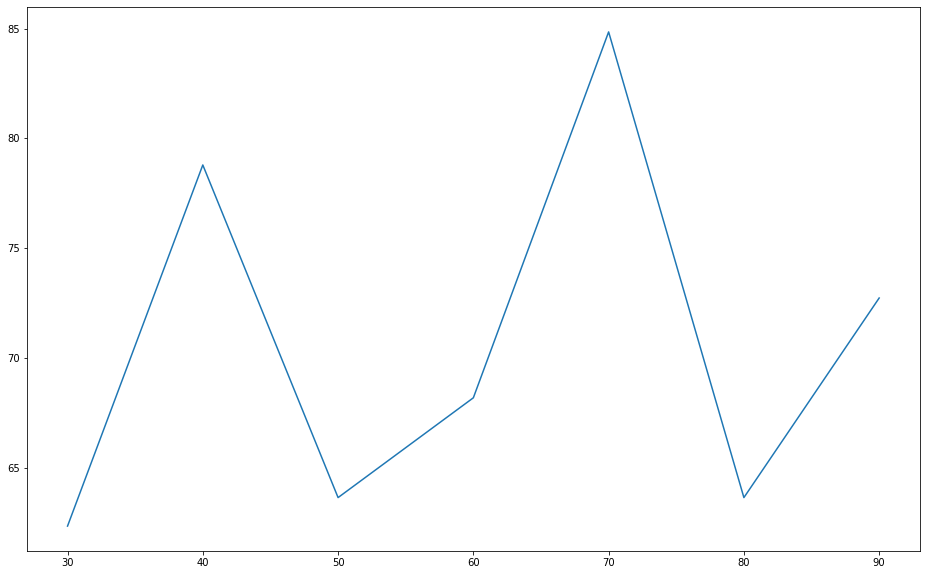

In [ ]:

prcnt_arr = [30,40,50,60,70,80,90]
acc_vec = []
for p in prcnt_arr:
  acc, conf_mat = IsolatedDigitRecognition(data_location1,p)
  print(f"Accuracy for split percentage : {p} => {acc}")
  acc_vec.append(acc)

plt.figure(figsize = (16,10))
plt.plot(prcnt_arr,acc_vec)


In [ ]:
acc2, conf_mat2 = IsolatedDigitRecognition(data_location2)

1399 600


In [ ]:
acc1, conf_mat1 = IsolatedDigitRecognition(data_location1)

77 33


Accuracy for Recorded Digit Data : 84.84848484848484


Text(0.5, 1.05, 'Confusion Matrix')

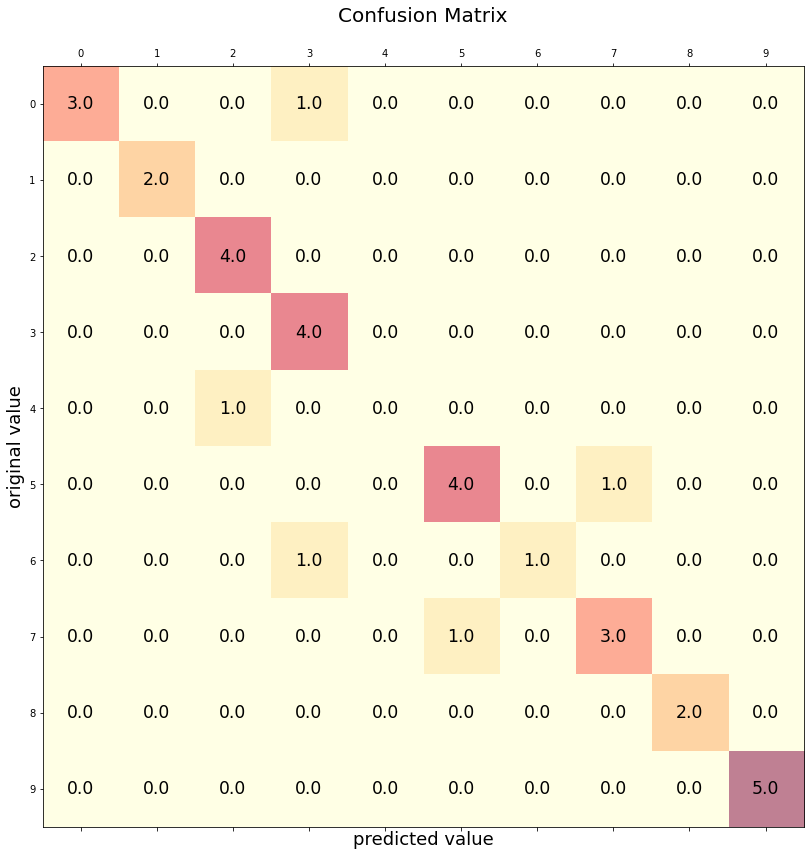

In [ ]:
# Confusion matrix
print(f"Accuracy for Recorded Digit Data : {acc1}")
fig, px = plt.subplots(figsize=(20, 14))
px.matshow(conf_mat1, cmap=plt.cm.YlOrRd, alpha=0.5)
for i1 in range(conf_mat1.shape[0]):
  for j1 in range(conf_mat1.shape[1]):
    px.text(x=j1,y=i1,s=conf_mat1[i1, j1], va='center', ha='center', size='xx-large')
px.set_xlabel('predicted value', fontsize = 18)
px.set_ylabel('original value', fontsize = 18)
px.set_xticks(np.arange(10))
px.set_yticks(np.arange(10))
px.set_title("Confusion Matrix", fontsize = 20)



Accuracy for MultiSpeakerDigitData : 87.83333333333333


Text(0.5, 1.05, 'Confusion Matrix')

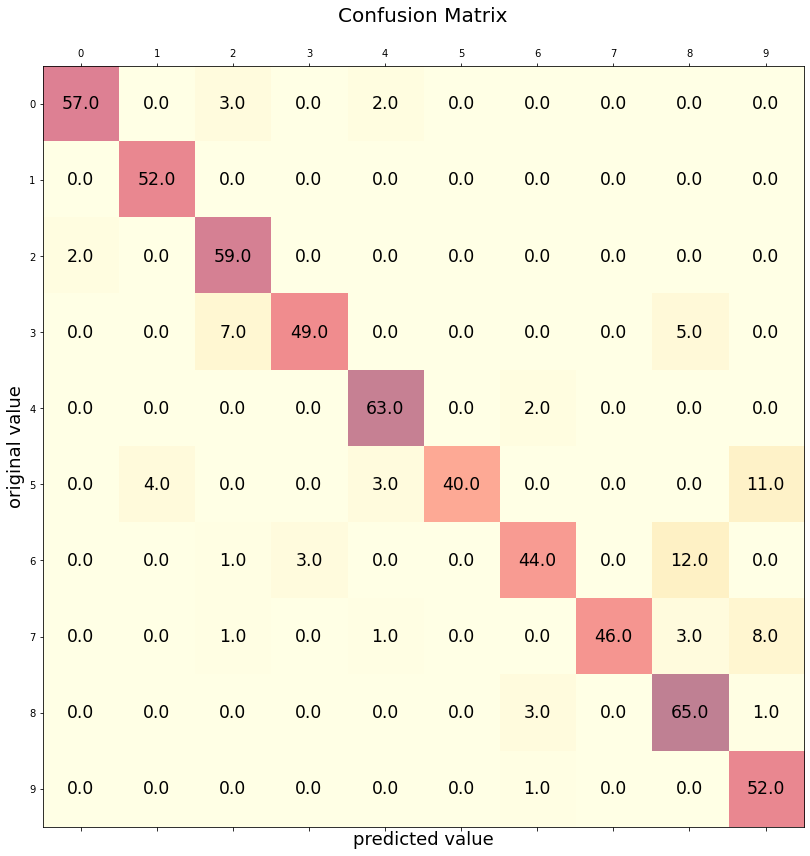

In [ ]:
print(f"Accuracy for MultiSpeakerDigitData : {acc2}")
fig, px = plt.subplots(figsize=(20, 14))
px.matshow(conf_mat2, cmap=plt.cm.YlOrRd, alpha=0.5)
for i1 in range(conf_mat2.shape[0]):
  for j1 in range(conf_mat2.shape[1]):
    px.text(x=j1,y=i1,s=conf_mat2[i1, j1], va='center', ha='center', size='xx-large')
px.set_xlabel('predicted value', fontsize = 18)
px.set_ylabel('original value', fontsize = 18)
px.set_xticks(np.arange(10))
px.set_yticks(np.arange(10))
px.set_title("Confusion Matrix", fontsize = 20)


**Report**

1. We can clearly see that there is increase in performance (increased accuracy) for MultiSpeakerDigitData if compared to DTW performance from last assignment.

2. Current HMM model deals with the statistical variations due to change in speaker, unlike the DTW.

3. Model was succesfully able to differenciate between digits.